# Goals
Optimasi Campaign Results terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

# Data Quality Check
- Q1:Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate, missing values atau outliers? Bagaimana mengatasinya?
- Q3: Apakah ada distribusi data yang tidak masuk akal?


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [90]:
df.shape

(2240, 28)

## Question 1
Apakah ada features yang data type-nya tidak sesuai?

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [92]:
# Note: Income(float), DT_Customer(date)

In [93]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
        
    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [94]:
df.columns = df.columns.str.replace(' ','')

In [95]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [96]:
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')

In [97]:
df['Income'] = df['Income'].astype('float')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) 

## Question 2
Adakah duplicate, missing values atau outliers? Bagaimana mengatasinya?

### Duplicates

In [98]:
df.duplicated().sum()

0

### Missing Values

In [99]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

note: 
gak mungkin orang gak punya Income, isi bagian income dengan mean/median, cara mengetahui diisi pake mean atau median bisa cek distribusinya

<AxesSubplot:xlabel='Income'>

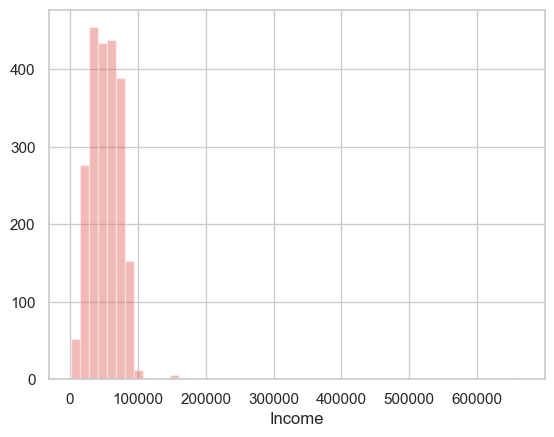

In [100]:
sns.distplot(df['Income'], kde=False, hist=True)

<AxesSubplot:>

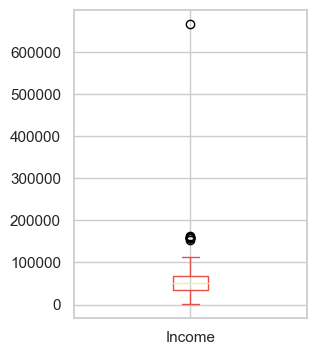

In [101]:
df['Income'].plot(kind='box', figsize=(3,4))

note: karna terdapat ouliers maka gunakan median

In [102]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Outliers

In [103]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [104]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'], inplace=True)

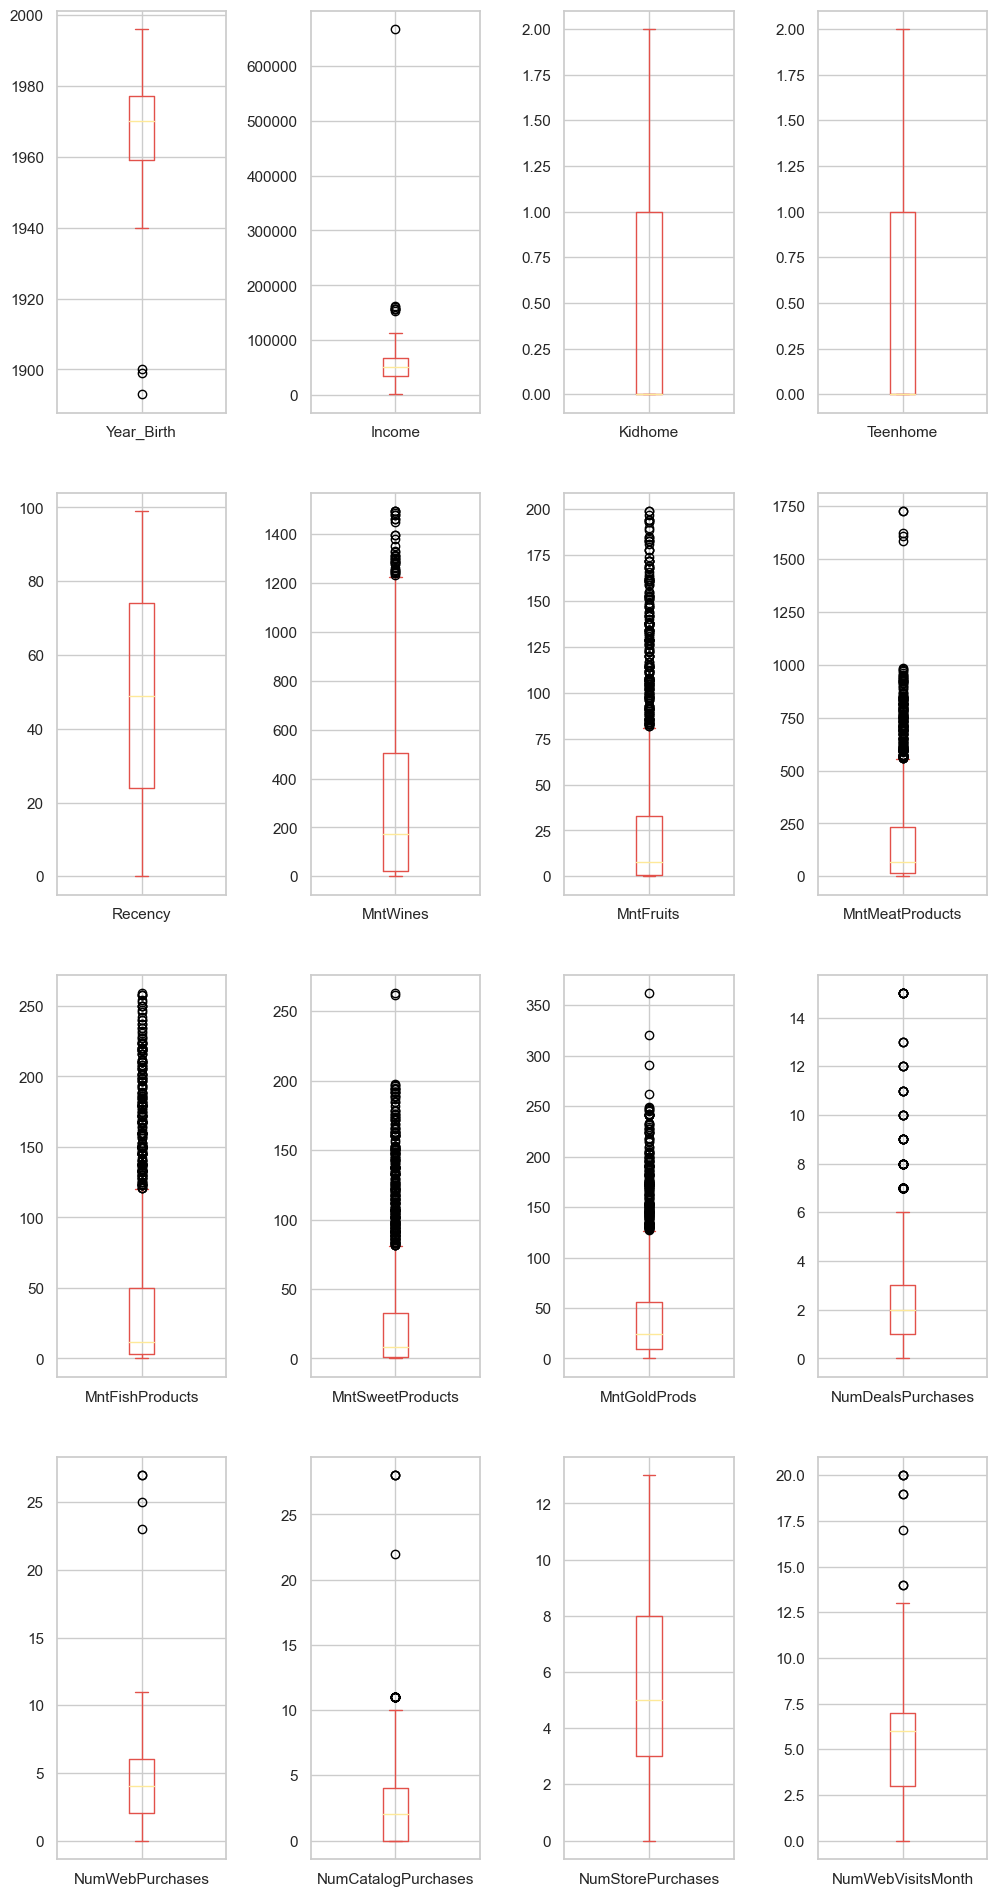

In [105]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,24))
plt.subplots_adjust(wspace=0.5)

In [106]:
df = df[df['Year_Birth'] >1900].reset_index(drop=True)

## Question 3
Apakah ada distribusi data yang tidak masuk akal?

In [107]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

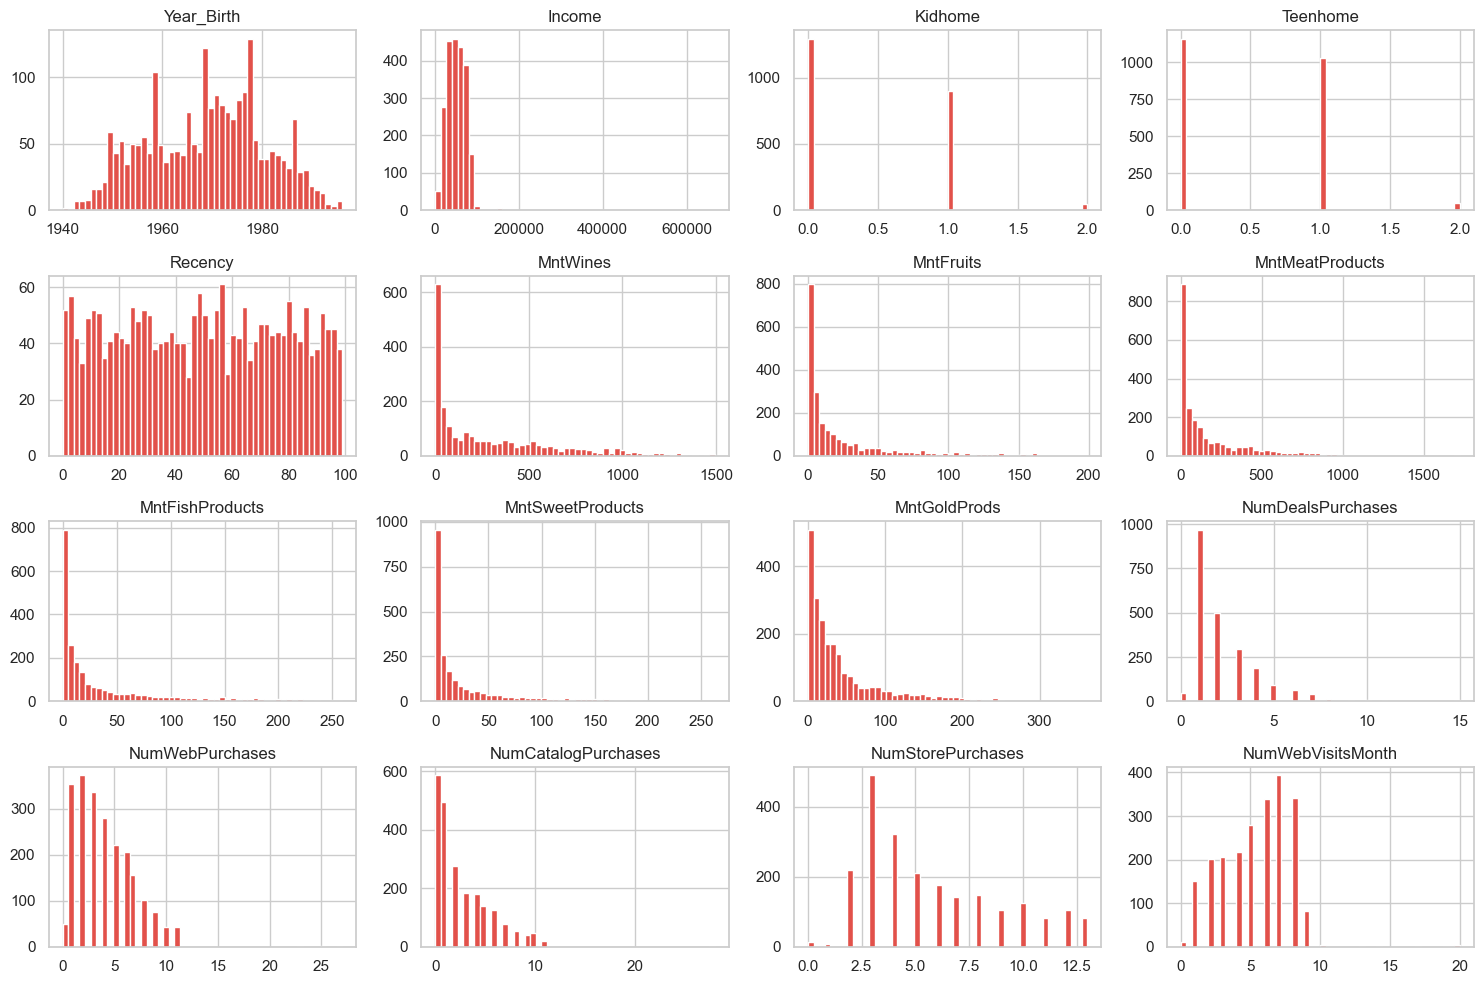

In [108]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# Data Insight

In [109]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Year_Birth

In [110]:
df['Customer_Age'] = df['Dt_Customer'].dt.year-df['Year_Birth']

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

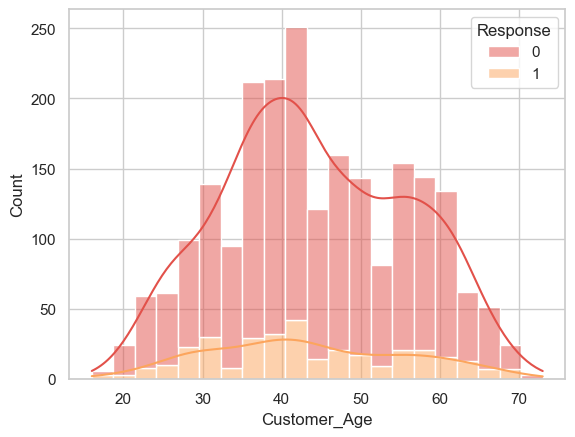

In [111]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

## Education

In [112]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [113]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

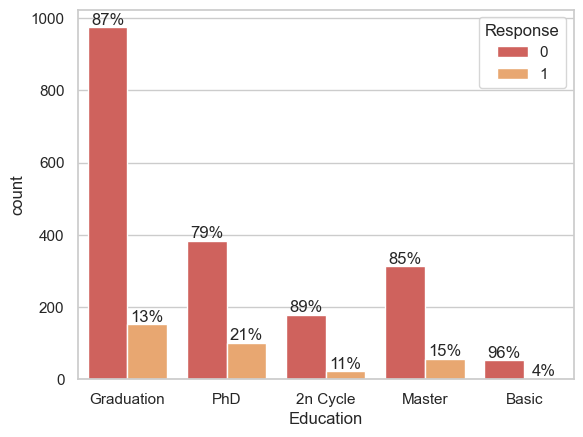

In [114]:
ax = sns.countplot(data=df, x='Education', hue='Response')
barPerc(df,'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

(0.0, 175000.0)

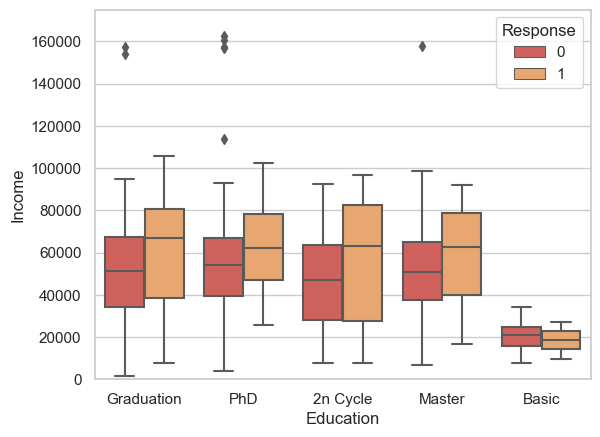

In [115]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# income yang lebih tinggi cenderung menerima atau membeli penawran campaign

## Marital Status

In [116]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [117]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))

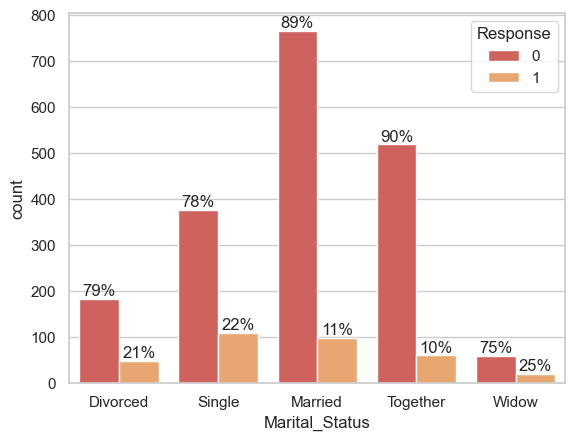

In [118]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Response')
barPerc(df,'Marital_Status', ax)

# ada kecenderungan jika customer membiayai hidup sendiri maka cenderung memeli/atau menerima penawaran campaign

## Kidhome & Teenhome

In [119]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [120]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

In [121]:
df.Num_Dependants.unique()

array([0, 1, 2, 3], dtype=int64)

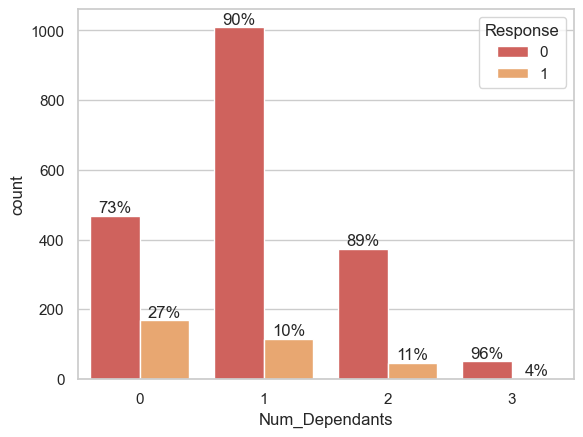

In [122]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=df)
barPerc(df, 'Num_Dependants', ax)


#customer yang tinggal sendiri/tidak memiliki anak cenderung menerima penawaran campaign

## Customer Join Date

In [126]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

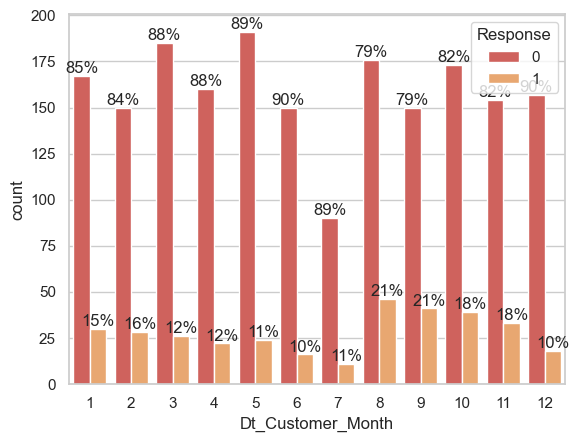

In [128]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

# Bulan 8 - 11 pembelian cenderung tinggi

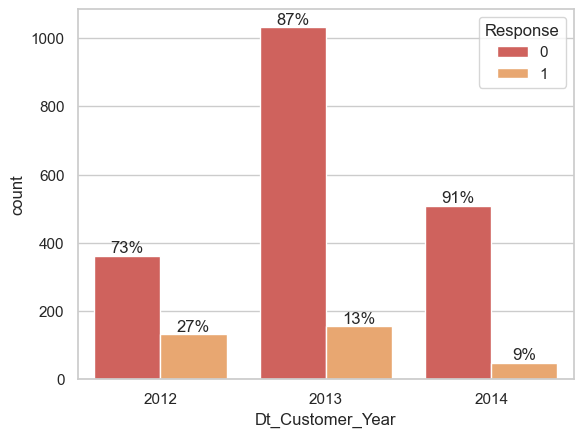

In [131]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

#Semakin lama customer join, maka semkain besar kemungkinan customer akan menerima penawaran campaign

## Recency

<AxesSubplot:xlabel='Recency', ylabel='Count'>

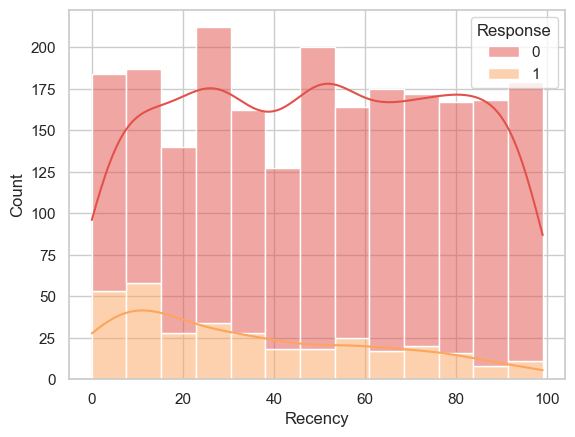

In [133]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

# customer yang belum lama membeli maka cenderung menerima penawaran campaign terbaru

## Amount Spent

In [134]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [138]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response',ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [140]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)

<AxesSubplot:xlabel='TotalAmount_Spent', ylabel='Count'>

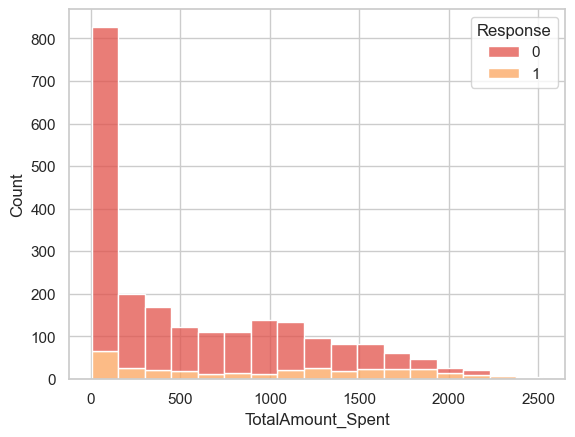

In [142]:
sns.histplot(data=df, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

#jika customer sudah spent money sekitar 1000-2000 dollar maka customer cenderung menerima penawaran campaign

In [143]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Mounth,Dt_Customer_Year,Dt_Customer_Month,TotalAmount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,6,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,6,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,5,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,5,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,4,91


## Purchases

In [155]:
purchase_features = [ c for c in df.columns if 'Purchases' in str(c)]
purchase_features.append('Response')

In [156]:
df[purchase_features].corr()[['Response']].sort_values(by='Response',ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [157]:
purchase_features = [ c for c in df.columns if 'Purchases' in str(c)]
df['Total_Purchase'] = df[purchase_features].sum(axis=1)

<AxesSubplot:xlabel='Total_Purchase', ylabel='Count'>

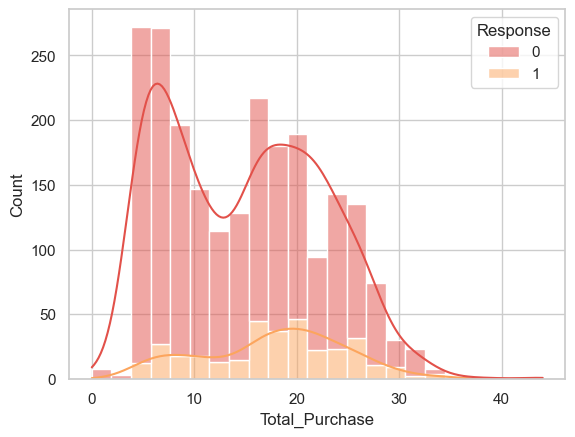

In [159]:
sns.histplot(data=df, kde=True, x='Total_Purchase', hue='Response', multiple='stack')

# Tidak ada pola unik atau pemisah antara respone 0 dan 1

## Number Web Visits

In [161]:
df[['NumWebVisitsMonth','Response']].corr()[['Response']]

# Tidak memiliki korealasi terhadap response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


In [162]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Mounth,Dt_Customer_Year,Dt_Customer_Month,TotalAmount_Spent,Total_Purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,6,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,6,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,5,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,5,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,4,91,8


## Previous Campaign

In [174]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [175]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response',ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


In [176]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
df['Total_AcceptedCmp'] = df[prev_cmp].sum(axis=1)

<AxesSubplot:xlabel='Total_AcceptedCmp', ylabel='Count'>

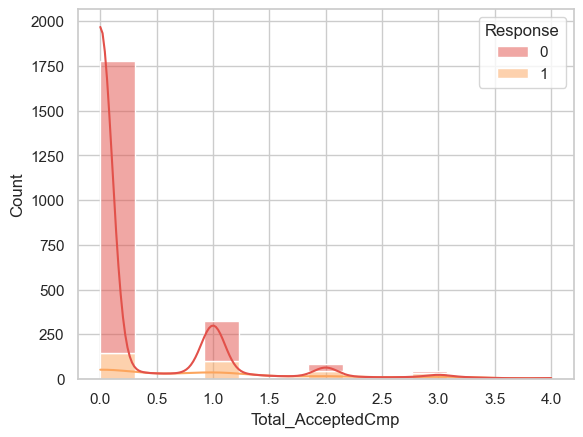

In [177]:
sns.histplot(data=df, kde=True, x='Total_AcceptedCmp', hue='Response', multiple='stack')

## Complain

In [179]:
df[['Complain','Response']].corr()[['Response']]

# tidak ada korelasi terhadap response

,Response
Complain,0.000185
Response,1.000000


## Country

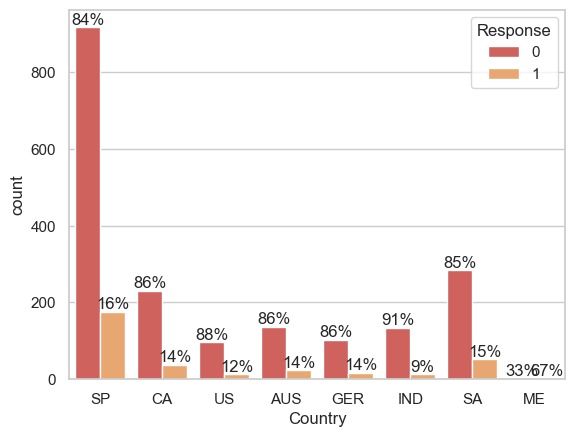

In [182]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

# Mexico dan Spain adalah negara yang cenderung menerima penawaran campaign

# Data Modelling

## Data Splitting
- Data Train = mengambil 60% data
- Data Validation = mengambil 20% data
- Data Test = mengambil 20% data

In [190]:
df.shape

(2237, 36)

In [183]:
from sklearn.model_selection import train_test_split

In [186]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [187]:
df_train.shape, df_valid.shape, df_test.shape

((1341, 36), (448, 36), (448, 36))

In [192]:
1341/2237, 448/2237, 448/2237

(0.599463567277604, 0.20026821636119804, 0.20026821636119804)